In [1]:
import cv2 , os
output='object'
if(output == 'Symbol'):
    data_path='Dataset step 2/Symbols'
elif output=='object':
    data_path='Dataset step 2/Object'

In [2]:
categories=os.listdir(data_path)

In [3]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'diya': 0, 'kalash': 1, 'sankh': 2}
['diya', 'kalash', 'sankh']
[0, 1, 2]


In [4]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)

In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.
C:\Users\sneha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sneha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sneha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sneha\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [8]:
target.shape, data.shape 

((1900, 3), (1900, 100, 100, 1))

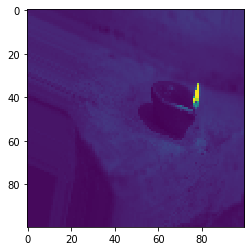

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
X1=data.reshape(data.shape[0],img_size,img_size)
plt.imshow(X1[100]) 
plt.show() 

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)

Train on 1368 samples, validate on 342 samples
Epoch 1/12
1368/1368 [==============================] - 35s 25ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.5154 - val_accuracy: 0.9006
Epoch 2/12
1368/1368 [==============================] - 38s 28ms/step - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.5255 - val_accuracy: 0.8947
Epoch 3/12
1368/1368 [==============================] - 36s 26ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.4811 - val_accuracy: 0.8947
Epoch 4/12
1368/1368 [==============================] - 51s 37ms/step - loss: 0.0279 - accuracy: 0.9942 - val_loss: 0.5347 - val_accuracy: 0.8947
Epoch 5/12
1368/1368 [==============================] - 66s 48ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.6001 - val_accuracy: 0.9035
Epoch 6/12
1368/1368 [==============================] - 66s 48ms/step - loss: 0.0218 - accuracy: 0.9920 - val_loss: 0.5517 - val_accuracy: 0.9152
Epoch 7/12
1368/1368 [==============================] - 66s 49ms/step - loss:

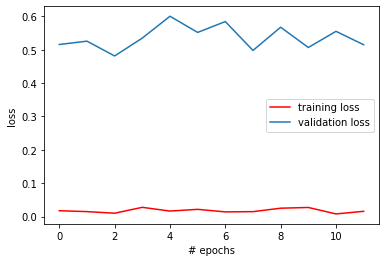

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [20]:
print(model.evaluate(test_data,test_target))

190/190 [==============================] - 2s 11ms/step
[0.4359791034146359, 0.8999999761581421]
